<a href="https://colab.research.google.com/github/Parul664/MRI_Classification/blob/master/UST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

 classification			  model_trial4
 classification_trial1		 'Report Day - 22.gdoc'
 classification_trial1__hdf5.h5   Resume.gdoc
 classification_trial2_vgg19	  segmentation
'Colab Notebooks'		  segmentation_model
 CV__Parul.pdf			  segmentation_model2
'Discrete Math Assignment.gdoc'   test.jpg
 IMG_6524.mov			  Train_data
 Letter.gdoc			  Train_data2
 lolwa.png			 'Untitled document.gdoc'
 model_trial1			  UST_Docs
 model_trial2			 'Your big idea.gslides'
 model_trial3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from skimage.util import random_noise
from matplotlib import cm
import cv2 as cv
from PIL import Image  
%matplotlib inline
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
def unet(pretrained_weights = None,input_size = (512,512,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256,  (3,3), activation = 'relu', padding = 'same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(256,  (3,3), activation = 'relu', padding = 'same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(512,(3,3), activation = 'relu', padding = 'same')(conv4)
    conv4 = BatchNormalization()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, (3,3), activation = 'relu', padding = 'same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(1024, (3,3), activation = 'relu', padding = 'same')(conv5)
    conv5 = BatchNormalization()(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(conv6)
    conv6 = BatchNormalization()(conv6)

    up7 = Conv2D(256, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(conv7)
    conv7 = BatchNormalization()(conv7)

    up8 = Conv2D(128, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(conv8)
    conv8 = BatchNormalization()(conv8)

    up9 = Conv2D(64, (2,2), activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(2, (3,3), activation = 'relu', padding = 'same')(conv9)
    conv9 = BatchNormalization()(conv9)

    conv10 = Conv2D(1, (1,1), activation = 'sigmoid')(conv9)

    model = Model(inputs,  conv10)

    model.compile(optimizer = Adam(lr=1e-4), loss = dice_coef_loss, metrics = [dice_coef])
    
    model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

def dice_coef(y_true, y_pred, smooth=1):
    epsilon = 1e-6
    y_predd = K.flatten(y_pred)
    y_truee = K.flatten(y_true)
    intersection = K.sum((y_truee * y_predd))
    return (2. * intersection + smooth) / (K.sum(K.square(y_truee)) + K.sum(K.square(y_predd)) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef( y_pred,y_true) 


In [ ]:

model = unet()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 512, 512, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 512, 512, 64) 256         conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 512, 512, 64) 36928       batch_normalization_1[0][0]      
____________________________________________________________________________________________

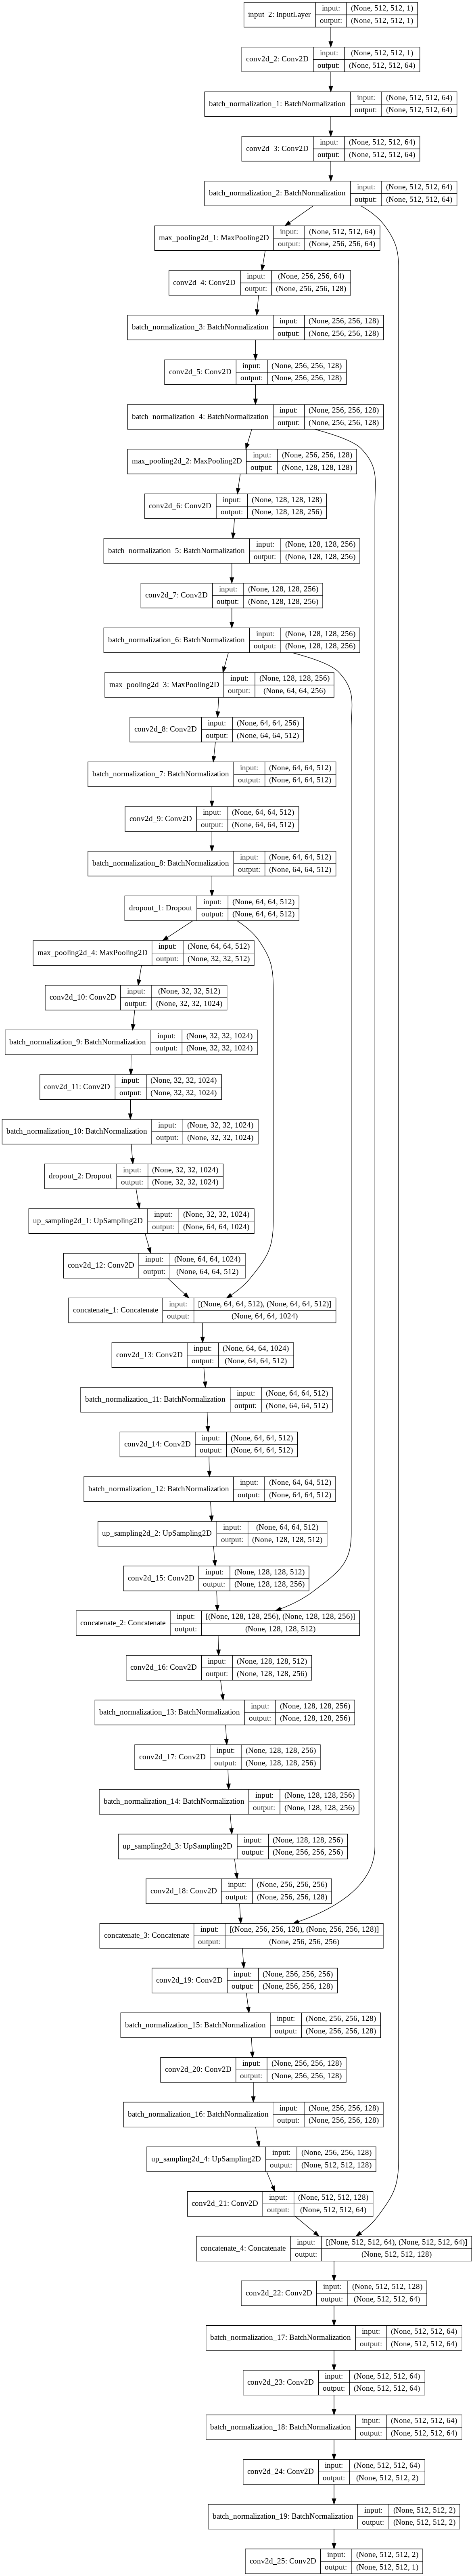

In [ ]:
import keras
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
target_size = (512,512)
batch_size = 2
seed = 9

def image_preprocessing(image):
  image = (image>200).astype('float32')
  return image


image_datagen = ImageDataGenerator(
                                  rotation_range=0.1,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  rescale = 1./255
                                   ) 
mask_datagen = ImageDataGenerator(
                                  rotation_range=0.1,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  preprocessing_function = image_preprocessing
                 ) 

image_generator =image_datagen.flow_from_directory("/content/drive/My Drive/Train_data/imagess/",
                                                   class_mode=None, 
                                                   batch_size = batch_size,
                                                   target_size=target_size,
                                                   seed=seed
                                                   ,color_mode='grayscale')

mask_generator = mask_datagen.flow_from_directory("/content/drive/My Drive/Train_data/maskss/",
                                                  class_mode=None, 
                                                  batch_size = batch_size,
                                                  target_size=target_size,
                                                  seed = seed,
                                                  color_mode='grayscale')

train_generator = zip(image_generator, mask_generator)

type(train_generator)


Found 956 images belonging to 1 classes.
Found 956 images belonging to 1 classes.


zip

In [ ]:
#IMPORTANT
#before running it once run and take photo of result
count =0
for img,mask in train_generator:
  count = 1
  print(img[0][:,:,0].max())
  print(np.shape(mask))
  if count==1:
    break

0.8257827
(2, 512, 512, 1)


In [ ]:
epochs = 10
steps_per_epoch = image_generator.samples//image_generator.batch_size

#Training using he-initialisation
history = model.fit_generator(generator=train_generator,
                    epochs=epochs,steps_per_epoch = steps_per_epoch
                    )

Epoch 1/10
478/478 [==============================] - 669s 1s/step - loss: 0.9125 - dice_coef: 0.0875
Epoch 2/10
478/478 [==============================] - 215s 449ms/step - loss: 0.8882 - dice_coef: 0.1118
Epoch 3/10
478/478 [==============================] - 215s 449ms/step - loss: 0.8645 - dice_coef: 0.1355
Epoch 4/10
478/478 [==============================] - 214s 448ms/step - loss: 0.8433 - dice_coef: 0.1567
Epoch 5/10
478/478 [==============================] - 215s 449ms/step - loss: 0.8199 - dice_coef: 0.1801
Epoch 6/10
478/478 [==============================] - 215s 449ms/step - loss: 0.7866 - dice_coef: 0.2134
Epoch 7/10
478/478 [==============================] - 214s 449ms/step - loss: 0.7482 - dice_coef: 0.2518
Epoch 8/10
478/478 [==============================] - 215s 449ms/step - loss: 0.6990 - dice_coef: 0.3010
Epoch 9/10
478/478 [==============================] - 214s 449ms/step - loss: 0.6371 - dice_coef: 0.3629
Epoch 10/10
478/478 [==============================] - 215

In [ ]:
#Training using he initialisation
#Training using he-initialisation
epochs = 20
history = model.fit_generator(generator=train_generator,
                    epochs=epochs,steps_per_epoch = steps_per_epoch
                    )

Epoch 1/20
478/478 [==============================] - 215s 449ms/step - loss: 0.5335 - dice_coef: 0.4665
Epoch 2/20
478/478 [==============================] - 215s 449ms/step - loss: 0.4623 - dice_coef: 0.5377
Epoch 3/20
478/478 [==============================] - 215s 449ms/step - loss: 0.4200 - dice_coef: 0.5800
Epoch 4/20
478/478 [==============================] - 215s 449ms/step - loss: 0.3627 - dice_coef: 0.6373
Epoch 5/20
478/478 [==============================] - 215s 449ms/step - loss: 0.3197 - dice_coef: 0.6803
Epoch 6/20
478/478 [==============================] - 215s 449ms/step - loss: 0.2957 - dice_coef: 0.7043
Epoch 7/20
478/478 [==============================] - 215s 449ms/step - loss: 0.2753 - dice_coef: 0.7247
Epoch 8/20
478/478 [==============================] - 215s 450ms/step - loss: 0.2486 - dice_coef: 0.7514
Epoch 9/20
478/478 [==============================] - 215s 450ms/step - loss: 0.2379 - dice_coef: 0.7621
Epoch 10/20
478/478 [==============================] - 

In [ ]:
epochs = 20
history = model.fit_generator(generator=train_generator,
                    epochs=epochs,steps_per_epoch = steps_per_epoch
                    )

Epoch 1/20
478/478 [==============================] - 215s 449ms/step - loss: 0.1294 - dice_coef: 0.8706
Epoch 2/20
478/478 [==============================] - 214s 449ms/step - loss: 0.1236 - dice_coef: 0.8764
Epoch 3/20
478/478 [==============================] - 214s 448ms/step - loss: 0.1111 - dice_coef: 0.8889
Epoch 4/20
478/478 [==============================] - 214s 448ms/step - loss: 0.1228 - dice_coef: 0.8772
Epoch 5/20
478/478 [==============================] - 214s 448ms/step - loss: 0.1055 - dice_coef: 0.8945
Epoch 6/20
478/478 [==============================] - 215s 449ms/step - loss: 0.1057 - dice_coef: 0.8943
Epoch 7/20
301/478 [=================>............] - ETA: 1:19 - loss: 0.0957 - dice_coef: 0.9043

dict_keys(['loss', 'dice_coef'])


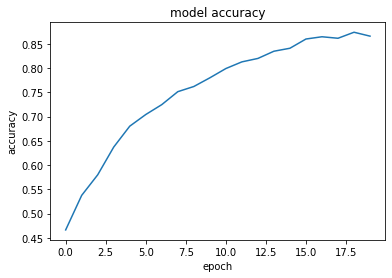

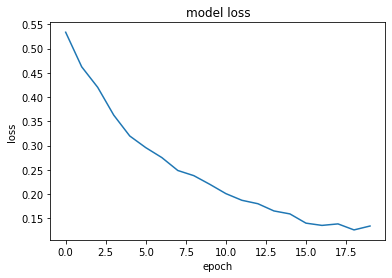

In [ ]:
print(history.history.keys())
plt.plot(history.history['dice_coef'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save("/content/drive/My Drive/segmentation_model")


In [ ]:
from keras import models
model = models.load_model("/content/drive/My Drive/segmentation_model2",custom_objects={'dice_coef_loss': dice_coef_loss,'dice_coef':dice_coef})

In [ ]:
#For preparing a dataset from the data in the google drive atleast in the case of Google colab
def prepare_train_dataset2(train_dir_img,train_dir_mask):
    train_x = []
    y = []
    count = 0
    currpted = []
    for file_name in os.listdir(train_dir_img):
        full_loc = os.path.join(train_dir_img,file_name)
        print(file_name)
        full_loc_mask = os.path.join(train_dir_mask,file_name)
        img = Image.open(full_loc)
        mask = Image.open(full_loc_mask)
        img = tf.keras.preprocessing.image.img_to_array(img)
        mask = tf.keras.preprocessing.image.img_to_array(mask)
        img = img/255
        mask = (mask>200).astype('float32')
        train_x.append(img)
        y.append(mask)
        count+=1
        if(count>10):
          break
    train_x = np.asarray(train_x)
    y = np.asarray(y)
    return train_x,y
        
        
    print("There are "+str(len(train_x))+" images and "+ str(len(y))+ "masks in the train datset")        
        

In [ ]:
train_dir_img= "/content/drive/My Drive/Train_data2/imagess/images"
train_dir_mask= "/content/drive/My Drive/Train_data2/maskss/masks"
x,y = prepare_train_dataset2(train_dir_img,train_dir_mask)
print(np.shape(x),np.shape(y))

858.jpg
1856.jpg
2208.jpg
2975.jpg
747.jpg
2373.jpg
1977.jpg
2925.jpg
2883.jpg
2292.jpg
2010.jpg
(11, 512, 512, 1) (11, 512, 512, 1)


In [ ]:
y_pred = model.predict(x)

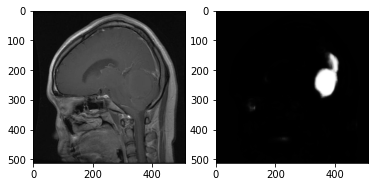

In [ ]:
fig, (a1, a2) = plt.subplots(1, 2)

#a1.imshow(y[0][:,:,0],cmap = "gray")
#a2.imshow(pred[0][:,:,0],cmap="gray")
a1.imshow(x[6][:,:,0],cmap = "gray")
a2.imshow(y_pred[6][:,:,0],cmap="gray")